# Introduction
Name: Nguyen Vinh Quang

ID: s3817788

Assessment 1 - COSC2753 - Machine Learning

# Objective
In this assessment, I will use the provided dataset provided by the Johns Hopkins University to train a ML model to predict if a patient will develop sepsis in the period of their stay in  the Intensive Care Units (ICUs).

# Data-preprocessing
Firstly, I will import libraries that will be use in this assignment. Then read 2 data files Paitients_Files_Train.csv and Paitients_Files_Test.csv respectively as train test data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Read 2 paitients data files as train data and test data
paitients_train_data = pd.read_csv("Paitients_Files_Train.csv")
print(paitients_train_data)
paitients_test_data = pd.read_csv("Paitients_Files_Test.csv")
print(paitients_test_data)

            ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance   Sepssis
0    ICU200010    6  148  72  35    0  33.6  0.627   50          0  Positive
1    ICU200011    1   85  66  29    0  26.6  0.351   31          0  Negative
2    ICU200012    8  183  64   0    0  23.3  0.672   32          1  Positive
3    ICU200013    1   89  66  23   94  28.1  0.167   21          1  Negative
4    ICU200014    0  137  40  35  168  43.1  2.288   33          1  Positive
..         ...  ...  ...  ..  ..  ...   ...    ...  ...        ...       ...
594  ICU200604    6  123  72  45  230  33.6  0.733   34          0  Negative
595  ICU200605    0  188  82  14  185  32.0  0.682   22          1  Positive
596  ICU200606    0   67  76   0    0  45.3  0.194   46          1  Negative
597  ICU200607    1   89  24  19   25  27.8  0.559   21          0  Negative
598  ICU200608    1  173  74   0    0  36.8  0.088   38          1  Positive

[599 rows x 11 columns]
            ID  PRG   PL  PR  SK   TS   M11    BD2 

In [2]:
paitients_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


After read and print out the data, I recorgnize that the target column "Sepssis" is currently in object data type so I need to convert the value its data type to int.

In [3]:
# Convert Sepssis to 1 if Positive and 0 if Negative
paitients_train_data.loc[paitients_train_data['Sepssis'] == 'Positive', 'Sepssis'] = 1
paitients_train_data.loc[paitients_train_data['Sepssis'] == 'Negative', 'Sepssis'] = 0

# Convert Sepssis data type from object to int
paitients_train_data['Sepssis'] = paitients_train_data['Sepssis'].astype('int64')
paitients_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 51.6+ KB


# EDA

In order to have an insight on the dataset, I need to use the histogram to see the distribution of the data, box plots to point out outliers and the correlation matrix to see relationship between attributes. Furthermore, I use describe() function to get various summary statistics like minimum and maximum values.

PRG             AxesSubplot(0.125,0.772143;0.133621x0.107857)
PL           AxesSubplot(0.285345,0.772143;0.133621x0.107857)
PR            AxesSubplot(0.44569,0.772143;0.133621x0.107857)
SK           AxesSubplot(0.606034,0.772143;0.133621x0.107857)
TS           AxesSubplot(0.766379,0.772143;0.133621x0.107857)
M11             AxesSubplot(0.125,0.642714;0.133621x0.107857)
BD2          AxesSubplot(0.285345,0.642714;0.133621x0.107857)
Age           AxesSubplot(0.44569,0.642714;0.133621x0.107857)
Insurance    AxesSubplot(0.606034,0.642714;0.133621x0.107857)
Sepssis      AxesSubplot(0.766379,0.642714;0.133621x0.107857)
dtype: object

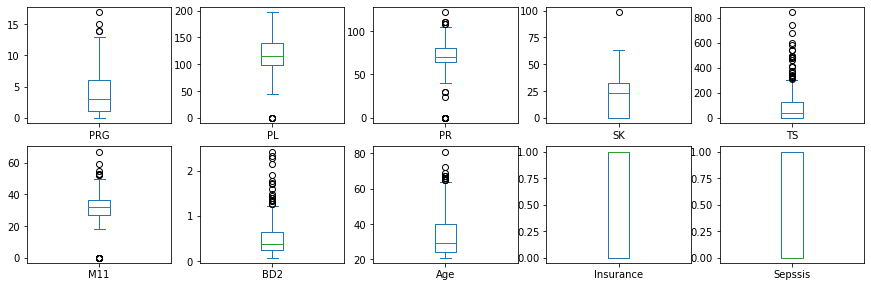

In [4]:
paitients_train_data.plot(kind='box', subplots=True, layout=(6,5), sharex=False, sharey=False, figsize=(15,15))

<Figure size 432x288 with 0 Axes>

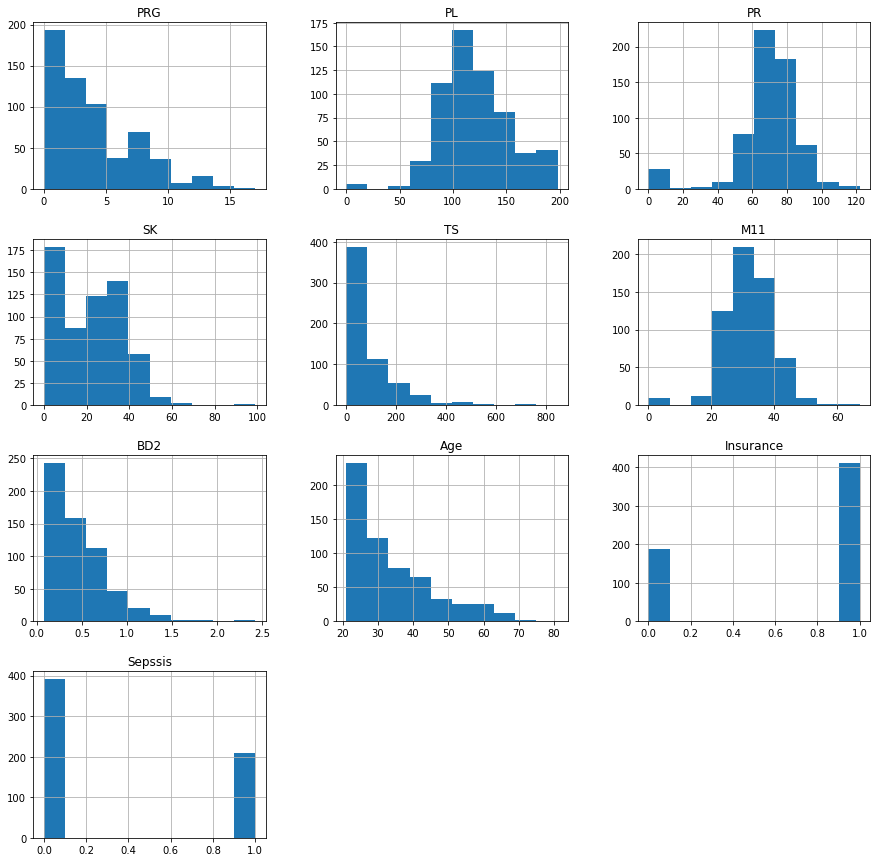

In [5]:
plt.figure()
paitients_train_data.hist(figsize=(15,15))
plt.show()

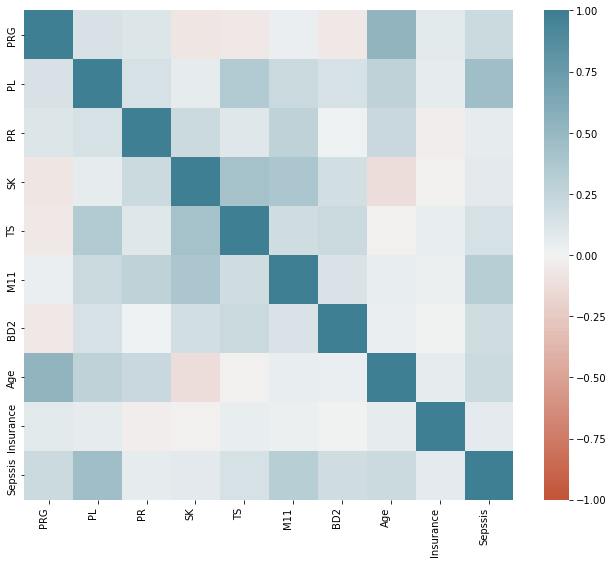

In [6]:
f, ax = plt.subplots(figsize=(11, 9))
corr = paitients_train_data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

In [7]:
paitients_train_data.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144,0.347245
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447,0.476492
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,1.000000


**Analyze data**

1. Histogram

    * Most of the attributes are heavily skewed to the left.
    * Values of TS and BD2 is far from the other attributes.
    
    
2. box plot

    * There are a lot of outliers in most of the attributes.
    
    
3. Correlation matrix

    * There is no pair of attributes that have a high correlation.
    

*Conclusion: Based on the graphs above, the data might need to be normalized and considered to eliminate as many outliers as possible.*


**Eliminate outlier**

In the data, there are some attributes, such as blood pressure(PR), body mass index(M11) and plasma glucose(PRG) can be recognized and researched. Moreover, the README.md file has declared that some attributes miss values. 
+ Based on the Centers for Disease Control, blood pleasure value can never be zero. (Centers for Disease Control and Prevention)
+ About the body mass index, zero value is very preposterous because this attribute is a measure of body fat based on height and weight. (National Heart, Lung, and Blood Institudte)
+ Plasma Glucose is a blood sugar level. Because the values of this attribute range from 0 to max 17 and there is no standard unit for measuring, values can represent the level of Plasma Glucose.

*Conclusion: Based on the box plots of PR and M11, the value zero of these attributes are recognized as outliers that understand as empty values so I will replace it with the corresponding median.*

In [8]:
paitients_train_data.loc[paitients_train_data['PR'] == 0, 'PR'] = paitients_train_data['PR'].median()
paitients_train_data.loc[paitients_train_data['M11'] == 0, 'M11'] = paitients_train_data['M11'].median()

# Setting up the performance (evaluation) metric

Based on the News in Health, Sepsis is also known as blood poisoning. Even with early treatment, this disease can kill 1 in 5 affected people (News in Health). Therefore, Sepsis can highly cause fatalities if it is not recognized on time.

Realizing the danger of Sepsis, I want my model to get as many affected cases as possible so I will consider using `recall_score` and `f1_score` as metrics to measure performance. Moreover, because all of these attributes are statistics to diagnose Sepsis, I want to equally treat them with `macro_average`. For `recall_score`, I expect to nearly reach 75% so `f1_score` will be slightly smaller, around 72%.

Finally, I will make the ultimate judgment with the `ROC curve` and `AUC_score` metrics. 

# Setup the experiment - data splits

In [9]:
paitients_data_X = paitients_train_data.drop(['ID', 'Insurance', 'Sepssis'], axis=1)
paitients_data_Y = paitients_train_data[['Sepssis']]
test_X = paitients_test_data.drop(['ID', 'Insurance'], axis=1)

print(paitients_data_X.shape)
print(paitients_data_Y.shape)
print(test_X.shape)

(599, 8)
(599, 1)
(169, 8)


In [10]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_Y, val_Y = train_test_split(paitients_data_X, paitients_data_Y, test_size=0.2, shuffle=True)
print(train_X.shape)
print(val_X.shape)
print(train_Y.shape)
print(val_Y.shape)

(479, 8)
(120, 8)
(479, 1)
(120, 1)


From train data set, I got `train_X`, `train_Y`, `val_X`, `val_Y` with train set is 80% and validation set is 20%
From test data set, I got `test_X`

Before I develop the first model, I will set up a function to reduce the redundancy when getting f1 and recall scores.

In [11]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

def get_f1_and_recall_scores(clf, train_X, train_Y, val_X, val_Y):
    # get prediction by provided the model
    train_pred = clf.predict(train_X)
    val_pred = clf.predict(val_X)
    
    # calculate f1 score
    train_f1 = f1_score(train_Y, train_pred, average='macro')
    val_f1 = f1_score(val_Y, val_pred, average='macro')
    
    # calculate recall score
    train_recall = recall_score(train_Y, train_pred, average='macro')
    val_recall = recall_score(val_Y, val_pred, average='macro')
    
    return train_f1, val_f1, train_recall, val_recall

# Models
## Logistic Regression (model 1)
Because of the output only has two value 0 and 1 so Logistic Regression is one of the best choice.


In [12]:
from sklearn.linear_model import LogisticRegression
clf_logR = LogisticRegression(random_state=0, penalty='none', solver='saga', 
                         max_iter=10000, 
                         class_weight='balanced')

In [13]:
train_X_logR = train_X
val_X_logR = val_X

In [14]:
clf_logR.fit(train_X_logR, train_Y.to_numpy().ravel())

train_f1_logR, val_f1_logR, train_recall_logR, val_recall_logR = get_f1_and_recall_scores(clf_logR, train_X_logR, train_Y, val_X_logR, val_Y)


print("Train F1-Score score of the logistic regression model: {:.3f}".format(train_f1_logR))
print("Validation F1-Score score of the logistic regression model: {:.3f}".format(val_f1_logR))

print("Train Recall score of the logistic regression model: {:.3f}".format(train_recall_logR))
print("Validation Recall score of the logistic regression model: {:.3f}".format(val_recall_logR))

Train F1-Score score of the logistic regression model: 0.668
Validation F1-Score score of the logistic regression model: 0.648
Train Recall score of the logistic regression model: 0.689
Validation Recall score of the logistic regression model: 0.668


**Analyze the first model: Logistic Regression**

Based on the result of the f1 and recall score, the gap between the train and validation is not negligible. However, the model does not have a good performance. It might be caused because the current model is linear. Therefore, I will apply `Polynomial Feature` and with `MinMaxScaler` as a scaling mechanism. I choose `MinMaxScaler` because histograms on the EDA did not have Normal or Gaussian distribution (GeeksforGeeks).

## Polynomial Logistic Regression (model 2)

In order to get the best order for preventing the model from overfitting or underfitting the data, I will use `GridSearchCV`

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

clf_poly_logR = LogisticRegression(random_state=0, penalty='none', solver='saga', 
                         max_iter=10000, 
                         class_weight='balanced')

parms = {'polynomialfeatures__degree': np.arange(2, 6)}
model = make_pipeline(PolynomialFeatures(), MinMaxScaler(), clf_poly_logR)

gridSearch = GridSearchCV(model, parms, scoring='recall')
gridSearch.fit(train_X, train_Y.to_numpy().ravel())

GridSearchCV(estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('minmaxscaler', MinMaxScaler()),
                                       ('logisticregression',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           penalty='none',
                                                           random_state=0,
                                                           solver='saga'))]),
             param_grid={'polynomialfeatures__degree': array([2, 3, 4, 5])},
             scoring='recall')

In [16]:
print(gridSearch.best_params_)

{'polynomialfeatures__degree': 2}


The best degree for the model is 2.

In [17]:
poly = PolynomialFeatures(2)
poly.fit(train_X)
train_X_poly_logR = poly.transform(train_X)
val_X_poly_logR = poly.transform(val_X)

In [18]:
scaler = MinMaxScaler()
scaler.fit(train_X_poly_logR)

train_X_normalized_poly_logR = scaler.transform(train_X_poly_logR)
val_X_normalized_poly_logR = scaler.transform(val_X_poly_logR)

Apply the `PolynomialFeatures` with order 2 with normalization

In [19]:
clf_poly_logR.fit(train_X_normalized_poly_logR, train_Y.to_numpy().ravel())

train_f1_normalized_poly_logR, val_f1_normalized_poly_logR, train_recall_normalized_poly_logR, val_recall_normalized_poly_logR = get_f1_and_recall_scores(clf_poly_logR, train_X_normalized_poly_logR, train_Y, val_X_normalized_poly_logR, val_Y)


print("Train F1-Score score of the polynomial logistic regression model: {:.3f}".format(train_f1_normalized_poly_logR))
print("Validation F1-Score score of the polynomial logistic regression model: {:.3f}".format(val_f1_normalized_poly_logR))

print("Train Recall score of the polynomial logistic regression model: {:.3f}".format(train_recall_normalized_poly_logR))
print("Validation Recall score of the polynomial logistic regression model: {:.3f}".format(val_recall_normalized_poly_logR))


Train F1-Score score of the polynomial logistic regression model: 0.777
Validation F1-Score score of the polynomial logistic regression model: 0.741
Train Recall score of the polynomial logistic regression model: 0.788
Validation Recall score of the polynomial logistic regression model: 0.756


**Analyze the second model: Polynomial Logistic Regression**

Based on the result of the f1 and recall score, the train is slightly higher than validation which means underfitting. Furthermore, the recall and f1 scores nearly reach my objective. Therefore, I should apply regularization to get a better model.

## Regularized Polynomial Logistic Regression (model 3)


In [21]:
lambda_paras = np.logspace(-5, 1, num=25)    # establish the lambda values to test (grid)
# Then search
train_performace = list()
valid_performace = list()
for lambda_para in lambda_paras:
    clf = LogisticRegression(penalty='l2', C = 1.0/lambda_para, 
                             random_state=0, solver='liblinear', max_iter=1000 , 
                             class_weight='balanced')   #create a classifier with a different lambda value
    
    clf.fit(train_X_normalized_poly_logR, train_Y.to_numpy().ravel())        #train the classifier
    
    train_pred = clf.predict(train_X_normalized_poly_logR)
    train_f1 = f1_score(train_Y, train_pred, average='macro')   #calculate the train f1-score
    
    val_pred = clf.predict(val_X_normalized_poly_logR)
    val_f1 = f1_score(val_Y, val_pred, average='macro')         #calculate the validation f1-score
    
    train_performace.append(train_f1)
    valid_performace.append(val_f1)

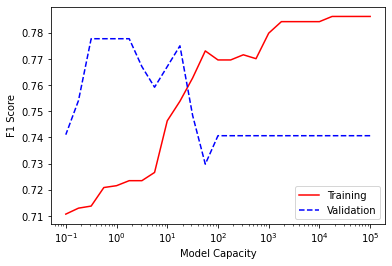

In [22]:
plt.plot([1.0/lambda_para for lambda_para in lambda_paras], 
         [tp for tp in train_performace], 'r-')
plt.plot([1.0/lambda_para for lambda_para in lambda_paras], 
         [vp for vp in valid_performace], 'b--')
plt.xscale("log")
plt.ylabel('F1 Score')
plt.xlabel('Model Capacity')
plt.legend(['Training','Validation'])
plt.show()

Based on the graph above, the best lambda (C) for the model is around 30

In [40]:
clf_regularised_poly_logR = LogisticRegression(penalty='l2', C = 29, 
                             random_state=0, solver='liblinear', max_iter=10000 , 
                             class_weight='balanced')   #create a classifier with a different lambda value
    
clf_regularised_poly_logR.fit(train_X_normalized_poly_logR, train_Y.to_numpy().ravel())        #train the classifier
    
train_f1_reguNormalized_poly_logR, val_f1_reguNormalized_poly_logR, train_recall_reguNormalized_poly_logR, val_recall_reguNormalized_poly_logR = get_f1_and_recall_scores(clf_regularised_poly_logR, train_X_normalized_poly_logR, train_Y, val_X_normalized_poly_logR, val_Y)

print("Train F1-Score score of the regularised polynomial logistic regression model: {:.3f}".format(train_f1_reguNormalized_poly_logR))    
print("Validation F1-Score score of the regularised polynomial logistic regression model: {:.3f}".format(val_f1_reguNormalized_poly_logR))

print("Train Recall score of the regularised polynomial logistic regression model: {:.3f}".format(train_recall_reguNormalized_poly_logR))
print("Validation Recall score of the regularised polynomial logistic regression model: {:.3f}".format(val_recall_reguNormalized_poly_logR))


Train F1-Score score of the regularised polynomial logistic regression model: 0.758
Validation F1-Score score of the regularised polynomial logistic regression model: 0.748
Train Recall score of the regularised polynomial logistic regression model: 0.766
Validation Recall score of the regularised polynomial logistic regression model: 0.762


**Analyze the third model: Regularized Polynomial Logistic Regression**

Based on the result of the f1 and recall score, all of my objectives has achieved. There is nearly no gap between the train and validation accuracy which means my model is appropriate-fitting. The recall and f1 scores also reach the goal from the beginning.

However, I will develop another classification model to compare with the Regularized Polynomial Logistic Regression which is the Decision Tree.

## Decision Tree

In order to get the best performance for Decision Tree, I will apply pre pruning to find the `max_depth` and `min_samples_split` by using `GridSearchCV`

In [52]:
from sklearn import tree

parameters = {'max_depth':np.arange(1,400, 50), 'min_samples_split':np.arange(2,50,5)}

dt_clf = tree.DecisionTreeClassifier(criterion='entropy', class_weight='balanced')
Gridclf = GridSearchCV(dt_clf, parameters, scoring='recall')
Gridclf.fit(train_X, train_Y)

GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='entropy'),
             param_grid={'max_depth': array([  1,  51, 101, 151, 201, 251, 301, 351]),
                         'min_samples_split': array([ 2,  7, 12, 17, 22, 27, 32, 37, 42, 47])},
             scoring='f1_macro')

In [53]:
print(Gridclf.best_score_)
print(Gridclf.best_params_)

0.7280920514015847
{'max_depth': 51, 'min_samples_split': 27}


In [54]:
clf_tree = Gridclf.best_estimator_

In [51]:
train_f1_tree, val_f1_tree, train_recall_tree, val_recall_tree = get_f1_and_recall_scores(clf_tree, train_X, train_Y, val_X, val_Y)
print("Train f1 score of Decision Tree: {:.3f}".format(train_f1_tree))
print("Validation f1 score of Decision Tree: {:.3f}".format(val_f1_tree))
print("Train Recall score of Decision Tree: {:.3f}".format(train_recall_tree))
print("Validation Recall score of Decision Tree: {:.3f}".format(val_recall_tree))

Train f1 score of Decision Tree: 0.840
Validation f1 score of Decision Tree: 0.670
Train Recall score of Decision Tree: 0.851
Validation Recall score of Decision Tree: 0.686


**Analyze the fourth model: Decision Tree**

Based on the result of the f1 and recall score, the gap between train and validation is quite big which means it is underfitting. 


# Ultimate Judgement

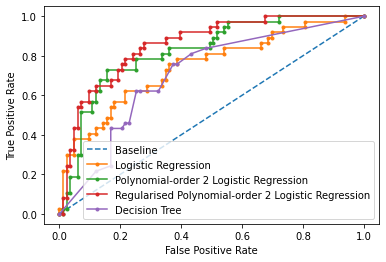

0.7460110713122762
0.8218821230869424
0.8567241940735917
0.7044936502767829


In [60]:
from sklearn.metrics import roc_curve, roc_auc_score

# Create baseline
r_prob = [0 for _ in range(len(val_Y))]

probas_logR = clf_logR.predict_proba(val_X_logR)
probas_normalized_poly_logR = clf_poly_logR.predict_proba(val_X_normalized_poly_logR)
probas_reguNormalized_poly_logR = clf_regularised_poly_logR.predict_proba(val_X_normalized_poly_logR)
probas_tree = clf_tree.predict_proba(val_X)
probas_tree_post = clf_post.predict_proba(val_X)

# Calculate AUC score
model1 = roc_auc_score(val_Y, probas_logR[:,1])
model2 = roc_auc_score(val_Y, probas_normalized_poly_logR[:,1])
model3 = roc_auc_score(val_Y, probas_reguNormalized_poly_logR[:,1])
model4 = roc_auc_score(val_Y, probas_tree[:,1])

# Calculate the ROC curve for each model
fpr, tpr, _  = roc_curve(val_Y, r_prob)
model1_fpr, model1_tpr, _ = roc_curve(val_Y, probas_logR[:, 1])
model2_fpr, model2_tpr, _ = roc_curve(val_Y, probas_normalized_poly_logR[:, 1])
model3_fpr, model3_tpr, _ = roc_curve(val_Y, probas_reguNormalized_poly_logR[:, 1])
model4_fpr, model4_tpr, _ = roc_curve(val_Y, probas_tree[:, 1])

# Plot the curves
plt.plot(fpr, tpr, linestyle='--', label="Baseline")
plt.plot(model1_fpr, model1_tpr, marker='.', label="Logistic Regression")
plt.plot(model2_fpr, model2_tpr, marker='.', label="Polynomial-order 2 Logistic Regression")
plt.plot(model3_fpr, model3_tpr, marker='.', label="Regularised Polynomial-order 2 Logistic Regression")
plt.plot(model4_fpr, model4_tpr, marker='.', label="Decision Tree")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Get AUC score
print(model1)
print(model2)
print(model3)
print(model4)

Until this point, I have created 4 models in order to predict whether patients might develop Sepsis or not and also plotted the ROC curve of each model. According to the graph above, the Regularised Polynomial-order 2 Logistic Regression has the best performance on the sensitivity with positive values. The AUC score of this model is also the highest which means has the best performance in distinguishing between positive and negative values. Moreover, the recall score and f1 score of the model are also highest respectively is 76% and 75%. However, some positive cases will be detected as negative cases.

**In conclusion, I will choose the third model which is the Regularised Polynomial-order 2 Logistic Regression to predict the best model.**

# Predicting test data

Because I decided to use the Regularised Polynomial-order 2 Logistic Regression as final model, I need to transform the test before stating prediction.

In [69]:
test_X_poly_logR = poly.transform(test_X)
test_X_normalized_poly_logR = scaler.transform(test_X_poly_logR)
test_pred = clf_regularised_poly_logR.predict(test_X_normalized_poly_logR)

In [67]:
pd.DataFrame(test_pred, columns=['Sepssis']).to_csv('S3817788 predictions.csv')

# Reference

Centers for Disease Control and Prevention n.d, *High Blood Pressure Symptoms and Causes*, Centers for Disease Control and Prevention, viewed 7 April 2022, \<https://www.cdc.gov/bloodpressure/about.htm#:~:text=The%20second%20number%2C%20called%20diastolic,%E2%80%9C120%2F80%20mmHg.%E2%80%9D>

GeeksforGeeks 2021, *Normalization vs Standardization*, GeeksforGeeks, viewed 7 April 2022, \<https://www.geeksforgeeks.org/normalization-vs-standardization/>

National Heart, Lung, and Blood Institudte n.d, *Calculate Your Body Mass Index*, National Heart, Lung, and Blood Institudte, viewed 7 April 2022, \<https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmicalc.htm>

News in Health 2014, *Surviving Sepsis*, News in Health, viewed 7 April 2022, \<https://newsinhealth.nih.gov/2014/08/surviving-sepsis>

Nguyen B 2022, *W3 - Lab Exercises*, Nguyen B, viewed 7 April 2022, \<https://rmit.instructure.com/courses/101178/pages/w3-lab-exercises?module_item_id=3902867>

Nguyen B 2022, *W4 - Lab Exercises*, Nguyen B, viewed 7 April 2022, \<https://rmit.instructure.com/courses/101178/pages/w4-lab-exercises?module_item_id=3902884>

Nguyen B 2022, *W5 - Lab Exercises*, Nguyen B, viewed 7 April 2022, \<https://rmit.instructure.com/courses/101178/pages/w5-lab-exercises?module_item_id=3902899>

Rahul105 2021, *Tune Hyperparameters with GridSearchCV*, Analytics Vidhya, viewed 7 April 2022, \<https://www.analyticsvidhya.com/blog/2021/06/tune-hyperparameters-with-gridsearchcv/>

Victor 2021, *Understanding the AUC-ROC Curve in Machine Learning Classification*, Analytics India Magazine, viewed 7 April 2022, \<https://analyticsindiamag.com/understanding-the-auc-roc-curve-in-machine-learning-classification/>